In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###  Missing Values- Feature Engineering- Day 1
Lifecycle of a Data Science Projects

Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
Feature Engineering---Handling Missing Values
Why are their Missing values?? Survey--Depression Survey

They hesitate to put down the information
Survey informations are not that valid
Men--salary
Women---age
People may have died----NAN
Data Science Projects---Dataset should be collected from multiple sources

### What are the different types of Missing Data?
##### Missing Completely at Random, MCAR: 
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Calculating Missing values

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Now in here Note if there is any realtion between "Age" and "Cabin" 
Age here is realted to Cabin, How-- This dasat is collected after the accident so the persong have died so we will not be able to capture its age, also the person is residing in that cabin so there is lot of null value in Age and Cabin. that culd be the reason 
###### Clearly this is not an example of MCAR as there is realtion between the two missing data, Exmaple could be Embarked

## checking for Embarked
##### Embarked means from which station passangers picked and drop

In [4]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Missing Data Not At Random(MNAR): 
Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.
##### Example as in Cabin and Age

### Calculating Mean of missing values in Cabin

In [5]:
df["cabin_null"]=np.where(df["Cabin"].isnull(),1,0)
df["cabin_null"].mean()

0.7710437710437711

## Alternatively we can do-

In [6]:
tot=df.shape[0]
df["Cabin"].isnull().sum()/tot

0.7710437710437711

### Fnidng average of person survived/demise missing value average

In [7]:
df.groupby(["Survived"])["cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

## Notice in here for people not survived missing value is 87% and for survived its 60% as we discussed earlier

# Missing At Random(MAR)
Men---hide their salary

Women---hide their age

### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

# 1)- Mean/ Median /Mode imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

# Imputation for Age

In [8]:
df1=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",usecols=["Age","Fare","Survived"])
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:ylabel='Age'>

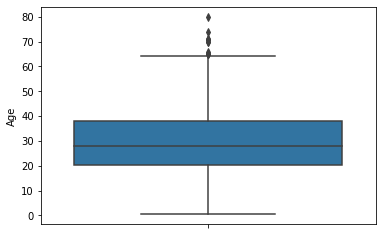

In [9]:
# Check for ouliers
sns.boxplot(y="Age",data=df1)

##### Since we have outliers we dont use Mean in such case, we use Median

In [10]:
df1.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

#### Imputing medians

In [11]:
meds=df1["Age"].median()
meds

28.0

In [12]:
def impute_nan(dta,varble,meds):
    df1[varble+"_median"]=df1[varble].fillna(meds)

In [13]:
impute_nan(df1,"Age",meds)

### Checking the standard deviation

In [14]:
print(df1["Age"].std())
print(df1["Age_median"].std())

14.526497332334044
13.019696550973194


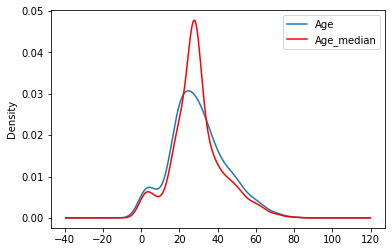

In [15]:
fig=plt.figure()
ax = fig.add_subplot(111)
df1['Age'].plot(kind='kde', ax=ax)
df1.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [16]:
#### Note in here the value of mean increases as we imputed the missing values here.

### Advantages And Disadvantages of Mean/Median Imputation
#### Advantages
1-Easy to implement(Robust to outliers)

2-Faster way to obtain the complete dataset
#### Disadvantages
1-Change or Distortion in the original variance

2-Impacts Correlation

# 2)- Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",usecols=["Age","Fare","Survived"])
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [18]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
# In ordder to find random value from a column we do-
df["Age"].dropna().sample()
# we use dropna as we dont want sample to select NAN value as a random sample, since it picks up any random value

543    32.0
Name: Age, dtype: float64

### Using the code below it impute random values to the all 177 missing values, but its not fixed as if we run it again, it again changes

In [4]:
df["Age"].dropna().sample(df["Age"].isnull().sum())

659    58.0
681    27.0
182     9.0
576    34.0
369    24.0
       ... 
512    36.0
200    28.0
104    37.0
69     26.0
817    31.0
Name: Age, Length: 177, dtype: float64

## We use random_state to fix the values

In [6]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

This condition is replacing NaN values with some sampled values, and random state fix it like seed in Numpy

In [13]:
def rand_impute(df,varbs,meds):
    df[varbs+"_median"]=df[varbs].fillna(meds)
    df[varbs+"_random"]=df[varbs]
    # It will have random sample to fill NAN
    random_smple=df[varbs].dropna().sample(df[varbs].isnull().sum(),random_state=0)
    # Pandas need to have same index in order to merge the dataset
    random_smple.index=df[df[varbs+"_random"].isnull()].index
    # using loc to call the matching index and column df.loc[row,col], We dont use iloc as we rename the index in previos line
    df.loc[df[varbs].isnull(),varbs+"_random"]=random_smple

In [14]:
# Computing median to fill
meds=df["Age"].median()
meds

28.0

In [19]:
rand_impute(df,"Age",meds)

In [20]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [17]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         714 non-null    float64
 2   Fare        891 non-null    float64
 3   Age_median  891 non-null    float64
 4   Age_random  891 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 34.9 KB


## plotting the graph

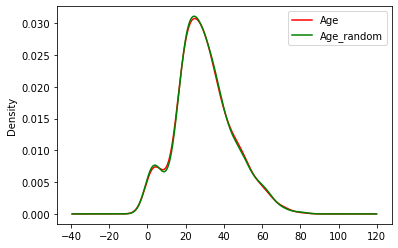

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,color="red")
#df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### Note the graph here is exactly same as variable "Age", Unlike the previous graph in MCA plotted using median, where the grapgh is narrow and tall means it having low variance as As variance increases, the normal curve becomes broader and shorter (As shown below)

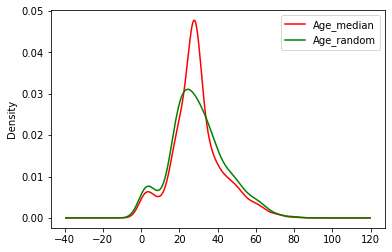

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
Easy To implement

There is less distortion in variance
#### Disadvantage
Every situation randomness wont work

# 3- Capturing NAN values with a new feature

In here we simply impute values into the issing values, like in example below we impute NAN for 1 and NOT_NULL for 0

It works well if the data are not missing completely at random(MNAR)

In [21]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",usecols=["Age","Fare","Survived"])
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [22]:
df["Age_NaN"]=np.where(df["Age"].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


###### In this technique we have created a new feature and where the value of  Age_naN is 1 which capture the info that the value is missing, also it could show us the importance of missing value  which will help us in our model creation 

### replace NAN value in Age with median or mean, could use nay

In [23]:
df["Age"].median()

28.0

In [28]:
df["Age"].fillna(df["Age"].median(),inplace=True)
df.head(8)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0


check here at index 5 NaN value is replaced by median

#### Advantages
Easy to implement

Captures the importance of missing values
#### Disadvantages
Creating Additional Features(Curse of Dimensionality)

## 4 End of Distribution imputation
If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",usecols=["Age","Fare","Survived"])
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


<AxesSubplot:>

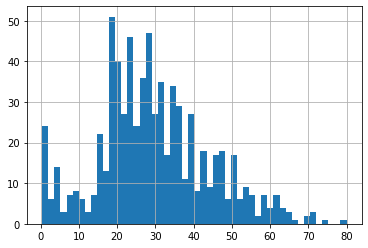

In [5]:
df.Age.hist(bins=50)

In here we take the value at far end and replace them with NaN value, Here far end values are approx between 75-80 as shown in histogram above

##### Chcking for ouliers

E:\Software_install\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

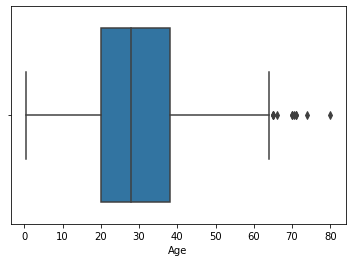

In [6]:
sns.boxplot('Age',data=df)

##### Usually to get extreme value we take value (Mean+3 std. deviation)

In [11]:
extreme=df["Age"].mean()+3*df["Age"].std()
extreme

73.27860964406095

In [24]:
meds=df["Age"].median()
meds

28.0

In [19]:
def extreme_impute(df,varbs,meds,extreme):
    df[varbs+"_end_distribution"]=df[varbs].fillna(extreme)
    df[varbs].fillna(meds,inplace=True)
    


In [21]:
extreme_impute(df,"Age",meds,extreme)

In [22]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

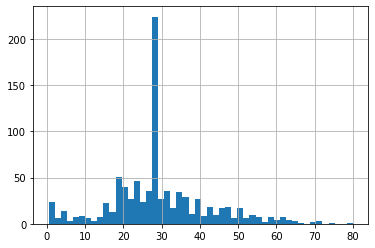

In [23]:
df['Age'].hist(bins=50)

##### In here most of the values are arounfd median i.e 28

<AxesSubplot:>

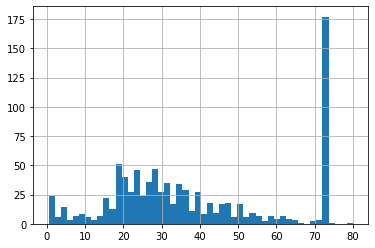

In [25]:
df['Age_end_distribution'].hist(bins=50)

##### In here most of the values are around extreme value i.e 78 also it has taken care of the outliers

E:\Software_install\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_end_distribution'>

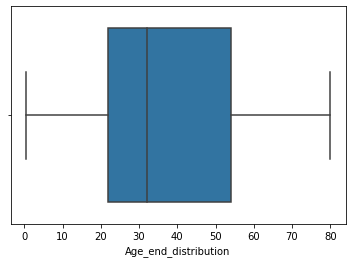

In [27]:
sns.boxplot("Age_end_distribution",data=df)

##### Advantages
* Easy to Impliment
* Capture the importance of missingnes if there is one

##### Disadvantages
* Distorts the orginal distribution of the variable
* If missingness is not important, it may mask the predictive power of the original variable by distorting the distribution
* If the num of NaN is big, it will mask the outliers in the distribution
* If the number of NAN is small, the replace NAN may be considerd an outlier and pre-processing in a subsequent feature engineering

## 5- Arbitrary Value Imputation
This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

###### Basically we impute the extreme value like the end values like "0" to the extreme value which we can find out by plotting histogram ( 0 and 80 in our case)

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",usecols=["Age","Fare","Survived"])
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


<AxesSubplot:>

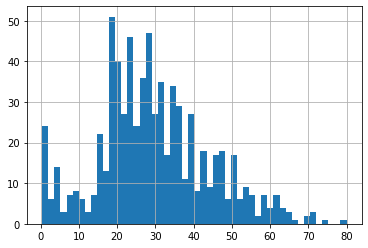

In [5]:
df["Age"].hist(bins=50)

In [7]:
def impute_abritry(df,varbs):
    df[varbs+"_xtrm_zero"]=df[varbs].fillna(0)
    df[varbs+"_xtrm_hundred"]=df[varbs].fillna(100)

In [8]:
impute_abritry(df,"Age")

In [10]:
df.head(3)

,Survived,Age,Fare,Age_xtrm_zero,Age_xtrm_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0


###### This meathod is taken from a Kaggle competeion, basically we use "random value Imputor" and "Mean/Median Imputer"

###### Advantages
* Easy to implement
* Captures the importance of missingess if there is one

###### Disadvantages
* Distorts the original distribution of the variable
* If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
* Hard to decide which value to use

# 6- Frequent categories imputation

In [2]:
df=pd.read_csv("loan.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
# to see al the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [75]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [17]:
# find percent of missing values
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [18]:
df.isnull().sum().sort_values(ascending=True)

SalePrice        0
BsmtQual        37
GarageType      81
FireplaceQu    690
dtype: int64

In [21]:
df.shape

(1460, 4)

#### Notice-->
* ##### "BsmtQual" and "GarageType" have very less number of missing values we can replcae them with most frequent occuring values

### Compute the frequency of every feature

In [10]:
# selecting variable expect "bool" and "number"
df.select_dtypes(exclude=["number","bool_"]).columns


Index(['BsmtQual', 'FireplaceQu', 'GarageType'], dtype='object')

In [64]:
# Calculating Frequency
df[['BsmtQual', 'FireplaceQu', 'GarageType']].mode()

,BsmtQual,FireplaceQu,GarageType
0,TA,Gd,Attchd


### Alternatively we can use Group bY

In [32]:
df.groupby("BsmtQual")["BsmtQual"].count().sort_values(ascending=False)

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

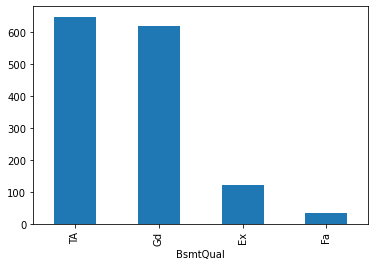

In [35]:
df.groupby("BsmtQual")["BsmtQual"].count().sort_values(ascending=False).plot.bar()

### Also we can use values_count

In [65]:
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

Similarly we can do this for all categorial variables

## Imputing the values

In [76]:
df.groupby("BsmtQual")["BsmtQual"].count().sort_values(ascending=False).index[0]

'TA'

In [81]:
def impute_mostOccur(df,varbs):
    val=df.groupby(varbs)[varbs].count().sort_values(ascending=False).index[0]
    df[varbs+"_mode"]=df[varbs]
    df[varbs+"_mode"]=df[varbs+"_mode"].fillna(val)

In [82]:
for i in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_mostOccur(df,i)

In [83]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_mode,FireplaceQu_mode,GarageType_mode
0,Gd,NaN,Attchd,208500,Gd,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Gd,Attchd
6,Ex,Gd,Attchd,307000,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,Gd,TA,Attchd
8,TA,TA,Detchd,129900,TA,TA,Detchd
9,TA,TA,Attchd,118000,TA,TA,Attchd


### Disadvantage
* This technique have an disdvatnage if num of missing value is high as in "FireplaceQu" its around 47 % if we replace the value with mode, it will distort its relation with the dependent(to predict) variable

### Advantage
* Easy To implement
* Fater way to implement

# 7- Adding a variable to capture NAN

In [14]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [15]:
# Ading a new feature where NaN value is represnted by 1 else 0
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [17]:
# Relace the naN value with most frequent value
freqnt=df["BsmtQual"].mode()[0]
print(freqnt)
df["BsmtQual"].fillna(freqnt,inplace=True)
print("-"*56)
df.head()

TA
--------------------------------------------------------


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [19]:
# Similarly do for FireplaceQu
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
freqnt=df["FireplaceQu"].mode()[0]
print(freqnt)
df["FireplaceQu"].fillna(freqnt,inplace=True)
print("-"*56)
df.head()

Gd
--------------------------------------------------------


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Advantgae 
* this technique caputre all the missing value and its places
#### Disadvantage
* This technique create extra variables

### Suppose if you have more frequent categories, we just replace NAN with a new category

In [32]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [33]:
# In here we create a new category Missing
def impute_nan(df,variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [34]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [35]:
# we dont need ['BsmtQual','FireplaceQu','GarageType'] get rid of them
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1,inplace=True)

In [36]:
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


### This is the most frequent technique